<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset


In [ ]:
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorna a amostra e o rótulo correspondente
        return self.dados[idx], self.labels[idx]


In [ ]:
# Dados de exemplo
dados = torch.randn(100, 3)  # 100 amostras, 3 características cada
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

In [ ]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
for dados, labels in dataloader:
    # Aqui você pode processar os dados, como treinar o modelo
    print(dados.shape, labels.shape)  # Exemplo: exibir o tamanho dos batches

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definindo o Dataset personalizado
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        return self.dados[idx], self.labels[idx]

# Criando um dataset de exemplo
dados = torch.randn(100, 3)  # 100 amostras, cada uma com 3 características
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Iterando sobre o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))  # Listando nomes de arquivos

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega imagem e máscara usando os nomes de arquivos
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx].replace(".png", "_mask.png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplicando transformações
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Tamanho padrão
    transforms.ToTensor()
])

# Criando o dataset
dataset = HeartSegmentationDataset(image_dir="/content/drive/MyDrive/DataSet/images", mask_dir="/content/drive/MyDrive/DataSet/masks", transform=transform)

In [ ]:
batch_size = 10

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterando sobre o dataloader
for images, masks in dataloader:
    print(images.shape)  # Exemplo: tamanho do batch de imagens
    print(masks.shape)   # Exemplo: tamanho do batch de máscaras

torch.Size([9, 3, 256, 256])
torch.Size([9, 1, 256, 256])


torch.Size([1, 256, 216])


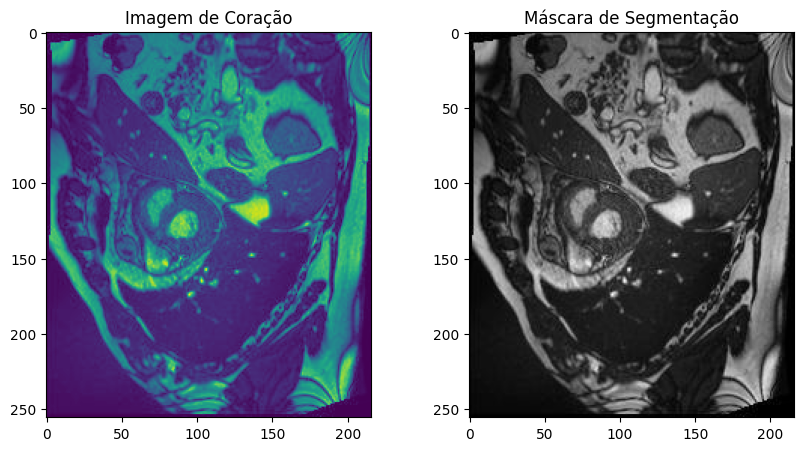

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Carregando a imagem
image_path = '/content/drive/MyDrive/DataSet/images/image.0001.jpg'
image = Image.open(image_path)

# Convertendo a imagem para tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

# Verificando a forma do tensor
print(image_tensor.shape)  # Deve ser [canais, altura, largura]

# Exibindo a imagem e a máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Garantindo que o tensor está em formato HWC para exibição
ax[0].imshow(image_tensor.permute(1, 2, 0).numpy())  # Convertendo para formato HWC
ax[0].set_title("Imagem de Coração")

# Carregando a máscara (ajuste o caminho conforme necessário)
mask_path = '/content/drive/MyDrive/DataSet/masks/image.0001.jpg'  # Substitua pelo caminho da sua máscara
mask = Image.open(mask_path).convert('L')  # Converte para escala de cinza
mask_tensor = transform(mask)  # Convertendo a máscara para tensor

# Exibindo a máscara em escala de cinza
ax[1].imshow(mask_tensor.squeeze(), cmap="gray")  # Exibindo a máscara
ax[1].set_title("Máscara de Segmentação")

plt.show()


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


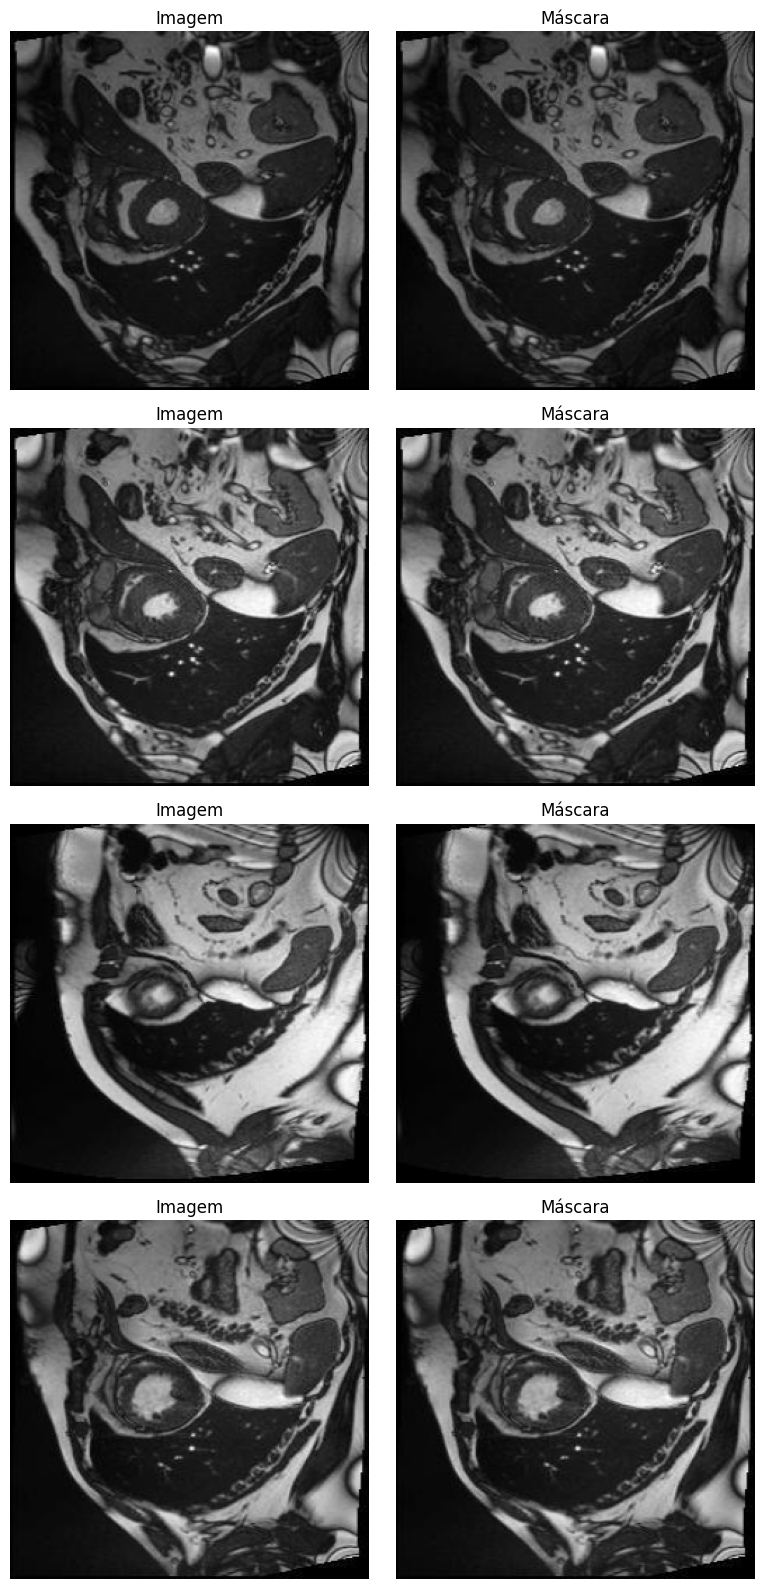

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/DataSet"

# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Chama a função para garantir que as pastas existam
criar_pastas_dataset()

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Define o caminho para as pastas de imagens e máscaras
images_dir = os.path.join(dataset_path, "images")
masks_dir = os.path.join(dataset_path, "masks")

# Transforma de exemplo (normalização e redimensionamento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Cria o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)

# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)
    epochs=10
    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Chama a função para exibir um batch de imagens e máscaras
visualizar_batch(dataloader)

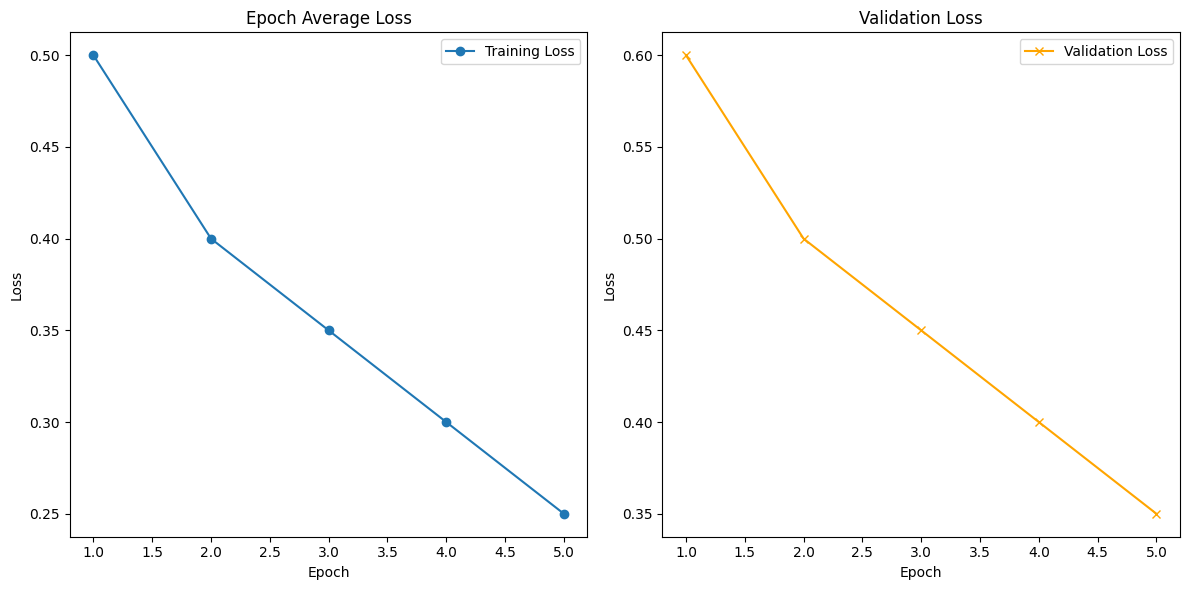

In [ ]:
import matplotlib.pyplot as plt

# Exemplo de inicialização de variáveis
epoch_loss_values = [0.5, 0.4, 0.35, 0.3, 0.25]  # Exemplo de perdas de treinamento por época
losses_validation = [0.6, 0.5, 0.45, 0.4, 0.35]  # Exemplo de perdas de validação
val_interval = 1  # Intervalo de validação (pode ser ajustado conforme necessário)

# Criar a figura para plotar
plt.figure("train", (12, 6))

# Subplot para perda média por época
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x_train = [i + 1 for i in range(len(epoch_loss_values))]
y_train = epoch_loss_values
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_train, y_train, marker='o', label='Training Loss')
plt.legend()

# Subplot para perda de validação
plt.subplot(1, 2, 2)
plt.title("Validation Loss")
x_val = [val_interval * (i + 1) for i in range(len(losses_validation))]
y_val = losses_validation
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_val, y_val, marker='x', color='orange', label='Validation Loss')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Melhora o layout
plt.show()


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Exemplo de definição de um modelo de rede neural convolucional simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 256)  # Ajuste o tamanho conforme necessário
        self.fc2 = nn.Linear(256, 1)  # Saída para segmentação binária

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = x.view(x.size(0), -1)  # Achata a saída
        x = nn.Sigmoid()(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicialização do modelo
model = SimpleCNN()

# Definição da função de perda e do otimizador
criterion = nn.BCELoss()  # Se estiver usando saída binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train and 4 validation


In [ ]:
import os
import glob

# Defina o diretório onde os dados estão armazenados
data_dir = "/content/drive/MyDrive/DataSet"

# Carregue e ordene as imagens e máscaras em formato NIfTI
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

# Crie uma lista de dicionários que associa cada imagem à sua máscara
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divida os dados em conjuntos de treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # Aqui consideramos os últimos 4 para validação

# Exiba os resultados
print("Número de arquivos de treinamento:", len(train_files))
print("Número de arquivos de validação:", len(val_files))


Número de arquivos de treinamento: 0
Número de arquivos de validação: 0


In [1]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# 1. Definir a classe de dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# 2. Definir transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform=transform)

# 4. Criar o DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# 5. Iterar sobre o DataLoader
for images, masks in dataloader:
    # Loop de treinamento ou validação
    pass


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


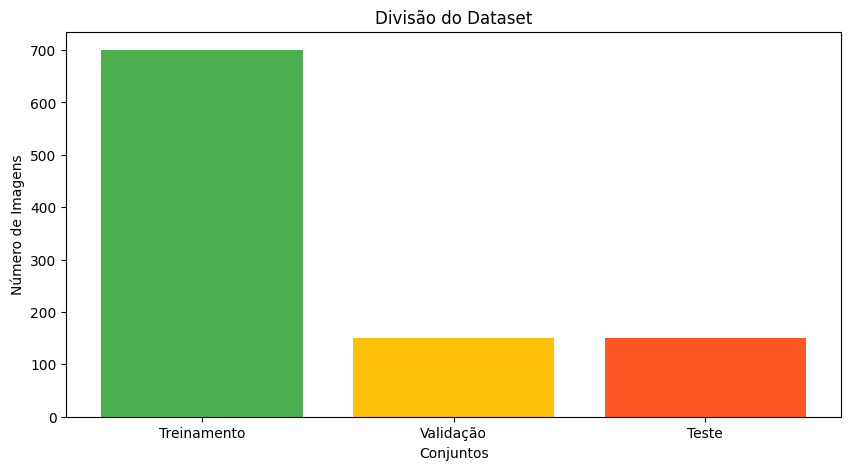

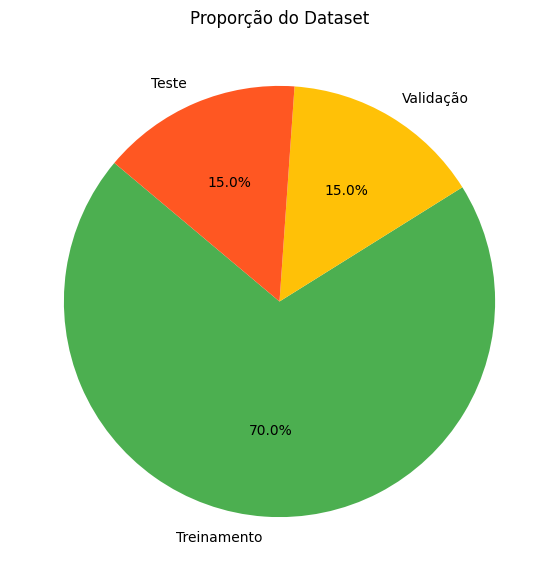

In [2]:
import matplotlib.pyplot as plt

# Definir tamanhos dos conjuntos
total_images = 1000  # Exemplo: dataset com 1000 imagens
train_size = int(0.7 * total_images)  # 70% para treinamento
val_size = int(0.15 * total_images)   # 15% para validação
test_size = total_images - train_size - val_size  # 15% para teste

# Dados para os gráficos
sizes = [train_size, val_size, test_size]
labels = ['Treinamento', 'Validação', 'Teste']
colors = ['#4CAF50', '#FFC107', '#FF5722']

# Gráfico de Barras
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Divisão do Dataset')
plt.xlabel('Conjuntos')
plt.ylabel('Número de Imagens')
plt.show()

# Gráfico de Pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporção do Dataset')
plt.show()


Exibindo exemplos de cada conjunto:


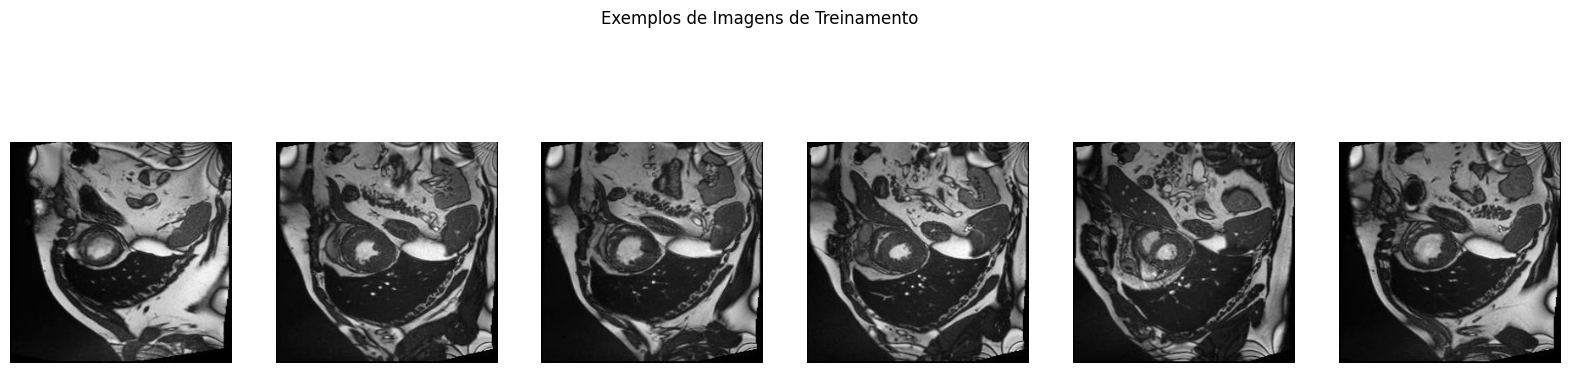

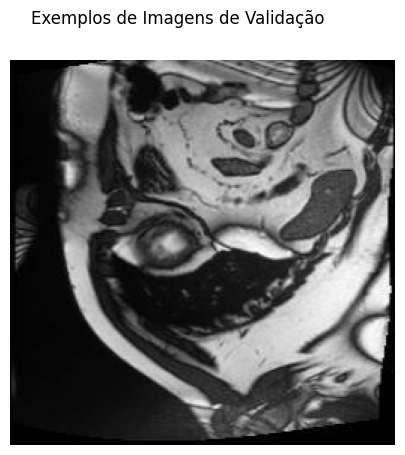

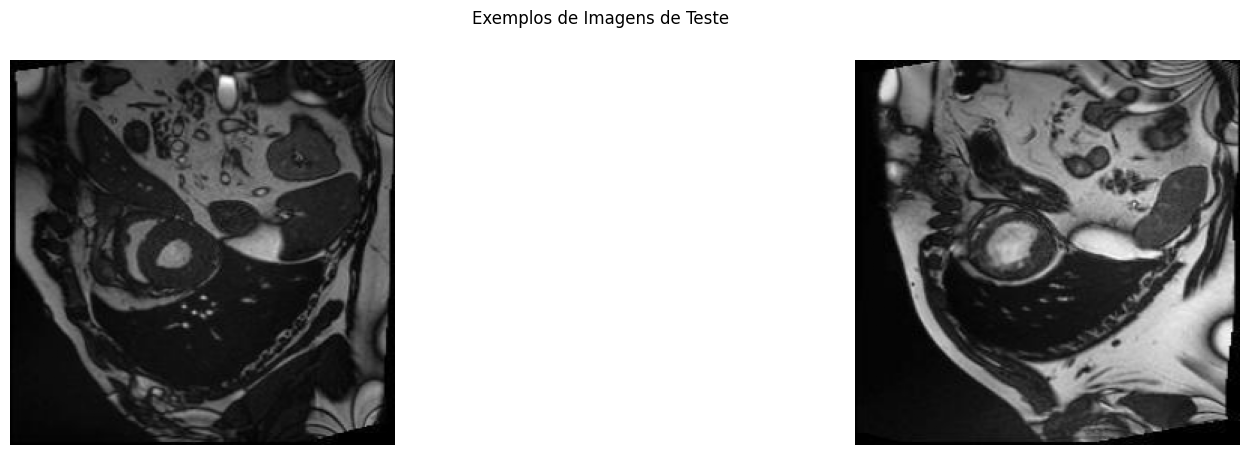

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 1. Criar a classe de dataset personalizada
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        # Filtrar apenas arquivos para evitar subdiretórios
        self.image_files = sorted([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if os.path.isfile(os.path.join(masks_dir, f))])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Configurar diretórios e transformações
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Transformação para imagens e máscaras
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset e dividir em treino, validação e teste
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 4. Criar DataLoaders para cada conjunto
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# 5. Exibir alguns exemplos de dados
def show_samples(dataloader, title):
    images, masks = next(iter(dataloader))
    num_images = images.size(0)  # Número real de imagens no lote

    # Cria uma figura com o número correto de subplots
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle(title)

    # Se num_images é 1, 'axes' não será uma lista, então ajustamos para ser iterável
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        img = images[i].permute(1, 2, 0)  # Rearrange para exibição no matplotlib
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Exibir exemplos dos conjuntos
print("Exibindo exemplos de cada conjunto:")
show_samples(train_loader, "Exemplos de Imagens de Treinamento")
show_samples(val_loader, "Exemplos de Imagens de Validação")
show_samples(test_loader, "Exemplos de Imagens de Teste")


In [21]:
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

        # Verificar se o número de imagens e máscaras corresponde
        if len(self.image_files) != len(self.mask_files):
            raise ValueError(f"Número de imagens ({len(self.image_files)}) e máscaras ({len(self.mask_files)}) não correspondem.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        # Verifica se o caminho da máscara é um arquivo
        if not os.path.isfile(mask_path):
            raise FileNotFoundError(f"Máscara não encontrada: {mask_path}")

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask





In [22]:
# importing the required libraries
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# defining the Dataset class
class data_set(Dataset):
    def __init__(self):
        numbers = list(range(0, 100, 1))
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


dataset = data_set()

# implementing dataloader on the dataset and printing per batch
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([ 5, 19, 34,  1, 59, 70, 23, 10, 95, 54])
1 tensor([83,  9, 46, 18, 26, 27, 76, 25, 30, 74])
2 tensor([24, 85, 37, 33, 81, 79, 56, 55,  4,  0])
3 tensor([65, 11, 68, 73, 51, 69, 82, 16, 22, 88])
4 tensor([43, 49, 13, 40, 80, 57, 41, 35, 42, 31])
5 tensor([99, 38, 17, 77, 87, 71, 96, 92, 21, 91])
6 tensor([98, 50, 44, 36, 94,  2, 86, 93, 63, 47])
7 tensor([60, 28,  8,  7, 29, 15,  6, 72, 12, 53])
8 tensor([89, 64, 78, 61, 62, 14, 66, 32, 84, 48])
9 tensor([52, 45, 97, 67, 39,  3, 90, 58, 20, 75])


In [23]:

# importing the required libraries
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import seaborn as sns
from torch.utils.data import TensorDataset

# defining the dataset consisting of
# two columns from iris dataset
iris = sns.load_dataset('iris')
petal_length = torch.tensor(iris['petal_length'])
petal_width = torch.tensor(iris['petal_width'])
dataset = TensorDataset(petal_length, petal_width)

# implementing dataloader on the dataset
# and printing per batch
dataloader = DataLoader(dataset,
                        batch_size=5,
                        shuffle=True)

for i in dataloader:
    print(i)

[tensor([5.7000, 1.7000, 5.4000, 1.5000, 1.7000], dtype=torch.float64), tensor([2.5000, 0.5000, 2.1000, 0.2000, 0.2000], dtype=torch.float64)]
[tensor([4.4000, 1.4000, 4.7000, 1.4000, 3.9000], dtype=torch.float64), tensor([1.2000, 0.3000, 1.6000, 0.3000, 1.2000], dtype=torch.float64)]
[tensor([6.1000, 5.8000, 1.2000, 1.4000, 4.8000], dtype=torch.float64), tensor([1.9000, 1.6000, 0.2000, 0.1000, 1.8000], dtype=torch.float64)]
[tensor([1.5000, 5.1000, 1.5000, 4.2000, 1.5000], dtype=torch.float64), tensor([0.2000, 2.4000, 0.2000, 1.3000, 0.2000], dtype=torch.float64)]
[tensor([6.4000, 1.6000, 3.5000, 6.6000, 5.1000], dtype=torch.float64), tensor([2.0000, 0.2000, 1.0000, 2.1000, 2.3000], dtype=torch.float64)]
[tensor([1.9000, 4.4000, 4.7000, 6.7000, 5.6000], dtype=torch.float64), tensor([0.2000, 1.4000, 1.4000, 2.0000, 2.4000], dtype=torch.float64)]
[tensor([6.7000, 5.7000, 5.4000, 5.1000, 4.0000], dtype=torch.float64), tensor([2.2000, 2.1000, 2.3000, 1.9000, 1.2000], dtype=torch.float64)]

In [36]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"

# Acesse as imagens e os rótulos
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))

# Corrigido: use 'for' ao invés de 'para' e 'in' ao invés de 'em' (em português)
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divide os arquivos em treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train e 4 arquivos de validação

train_files  # Para exibir os arquivos de treino




[]